# <p style="padding:10px;background-color:#E7B10A;margin:0;color:#141E46;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 10px 20px;overflow:hidden;font-weight:500">BACS3074 Artifical Intelligence Assignment</p>

# <p style="padding:10px;background-color:#EFB495;margin:0;color:#213555;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Image Processing and Computer Vision (Digit and Letter Recognition Module)</p>

<p style="text-align:center; ">
<img src="https://online.stanford.edu/sites/default/files/styles/figure_default/public/2018-03/visual-computing.jpg?itok=KSTjzEcZ" style='width: 500px; height: 350px;'>
</p>

# <p style="padding:10px;background-color:#BB2525;margin:0;color:#040D12;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">IMPORTANT!!! this program is using 3 SVM with different kernels, if the total train data is exceeding 10k , modeling and predicting might take more than an hour to finish</p>

Each train data is in the 28x28 resolution format, so the computing demand is about, (numbers of training data) x 28 x 28 

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Dependencies</p>

In [5]:
import gzip
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV



from PIL import Image


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Global Variables</p>

In [2]:
digit_train_size = 1000
digit_test_size = 10000

letter_train_size = 9000
letter_test_size = 20800

digit_train_size is to determine the numbers of training datas for digits, maximum train data for digits is 60k

digit_test_size is to determine the numbers of test datas for digits, maximum is 10k

letter_train_size is to determine the numbers of training datas for letters, maximum train data for letters is 185k

letter_test_size is to determine the numbers of test datas for letters, maximum is 20.8k


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Preparation</p>



# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Digit Files</p>



In [3]:
x_tr_digit_fls = gzip.open('train-images-idx3-ubyte.gz','r')
x_te_digit_fls = gzip.open('test-images-idx3-ubyte.gz','r')

y_tr_digit_fls = gzip.open('train-labels-idx1-ubyte.gz','r')
y_te_digit_fls = gzip.open('test-labels-idx1-ubyte.gz','r')


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Letter Files</p>



In [4]:
x_tr_letter_fls = gzip.open('emnist-letters-train-images-idx3-ubyte.gz','r')
x_te_letter_fls = gzip.open('emnist-letters-test-images-idx3-ubyte.gz','r')

y_tr_letter_fls = gzip.open('emnist-letters-train-labels-idx1-ubyte.gz','r')
y_te_letter_fls = gzip.open('emnist-letters-test-labels-idx1-ubyte.gz','r')


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Opening Digit Files</p>



In [5]:
image_size = 28
num_images = digit_train_size
x_tr_digit_fls.read(16)
buf = x_tr_digit_fls.read(image_size * image_size * num_images)
x_tr_digit_raw = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
x_tr_digit_raw = x_tr_digit_raw.reshape(num_images, image_size, image_size, 1)

image_size = 28
num_images = digit_test_size
x_te_digit_fls.read(16)
buf = x_te_digit_fls.read(image_size * image_size * num_images)
x_te_digit_raw = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
x_te_digit_raw = x_te_digit_raw.reshape(num_images, image_size, image_size, 1)


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Opening Letter Files</p>



In [6]:
image_size = 28
num_images = letter_train_size
x_tr_letter_fls.read(16)
buf = x_tr_letter_fls.read(image_size * image_size * num_images)
x_tr_letter_raw = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
x_tr_letter_raw = x_tr_letter_raw.reshape(num_images, image_size, image_size, 1)

image_size = 28
num_images = letter_test_size
x_te_letter_fls.read(16)
buf = x_te_letter_fls.read(image_size * image_size * num_images)
x_te_letter_raw = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
x_te_letter_raw = x_te_letter_raw.reshape(num_images, image_size, image_size, 1)



# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Processing the file into each of a single element on it</p>



In [7]:
y_tr_digit_fls.read(8)
y_tr_digit_list = []
for i in range(0,digit_train_size):   
    buf = y_tr_digit_fls.read(1)
    y_tr_digit_list.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))
    
y_te_digit_fls.read(8)
y_te_digit_list = []
for i in range(0,digit_test_size):   
    buf = y_te_digit_fls.read(1)
    y_te_digit_list.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))
    
y_tr_letter_fls.read(8)
y_tr_letter_list = []
for i in range(0,letter_train_size):   
    buf = y_tr_letter_fls.read(1)
    y_tr_letter_list.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))
    
y_te_letter_fls.read(8)
y_te_letter_list = []
for i in range(0,letter_test_size):   
    buf = y_te_letter_fls.read(1)
    y_te_letter_list.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Processing the file into int64 format from uint8</p>






# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">These are the first 5 image for digit recognition training</p>


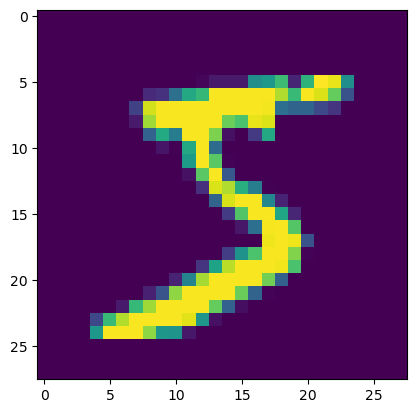

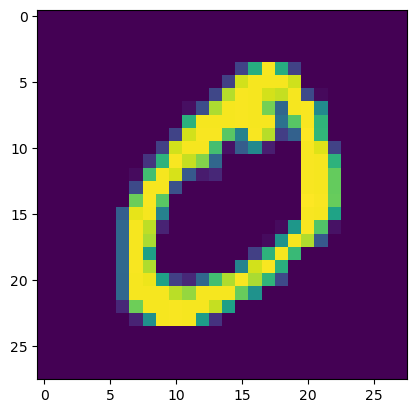

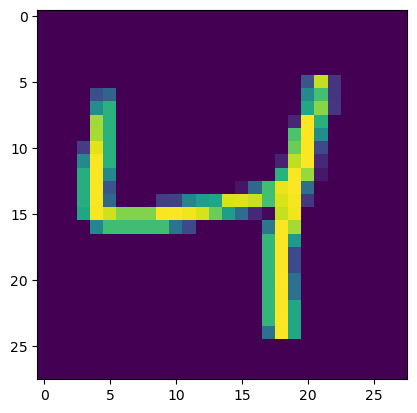

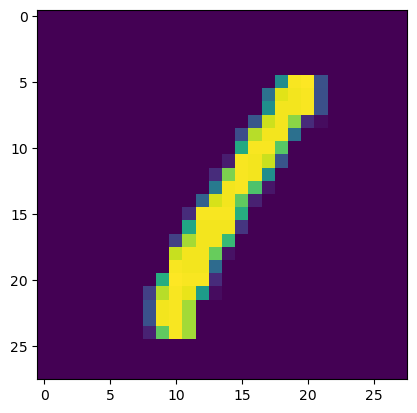

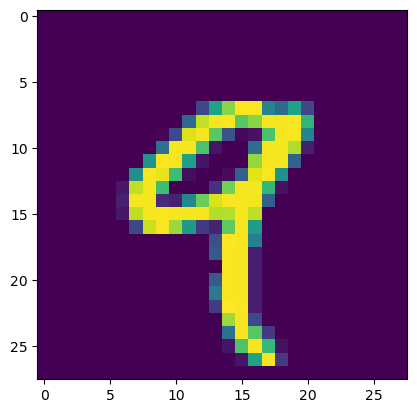

In [8]:
for i in range(5):
    image = np.asarray(x_tr_digit_raw[i]).squeeze()
    plt.imshow(image)
    plt.show()



# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">These are the first 5 digit labels for the corresponding images</p>


In [9]:
y_tr_digit = pd.DataFrame(y_tr_digit_list, columns =['labels'])
y_te_digit = pd.DataFrame(y_te_digit_list, columns =['labels'])
y_tr_digit.head(5)

,labels
0,5
1,0
2,4
3,1
4,9


# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">These are the first 5 image for letter recognition training</p>


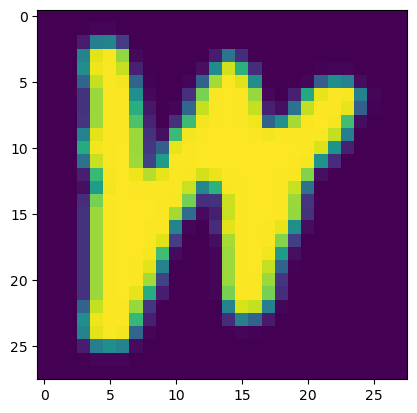

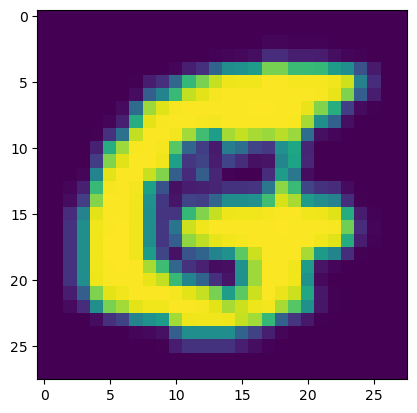

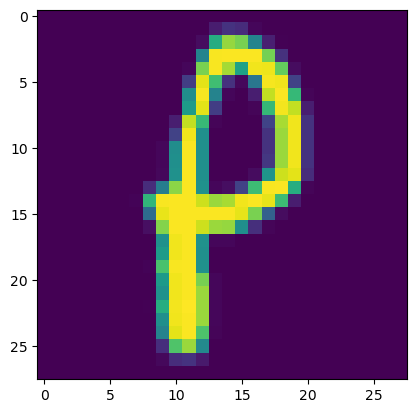

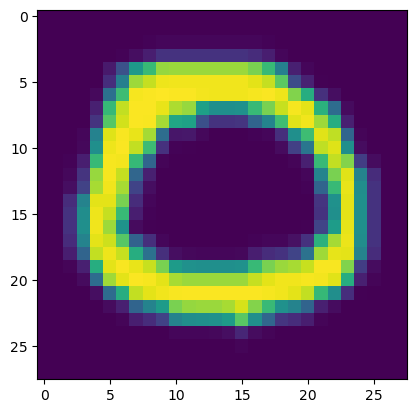

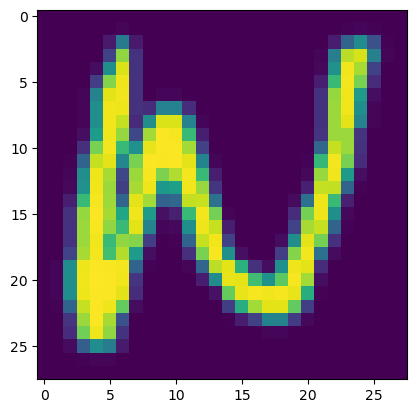

In [10]:
for i in range(5):
    image = np.asarray(np.rot90(np.flip(x_tr_letter_raw[i], 0), k=1, axes=(1, 0))).squeeze()
    plt.imshow(image)
    plt.show()


# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">These are the first 5 letter labels for the corresponding images</p>


In [11]:
y_tr_letter = pd.DataFrame(y_tr_letter_list, columns =['labels'])
y_te_letter = pd.DataFrame(y_te_letter_list, columns =['labels'])
y_tr_letter = y_tr_letter.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
y_te_letter = y_te_letter.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
y_tr_letter.head(5)

,labels
0,W
1,G
2,P
3,O
4,W



# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Converting a 2d array of the image into a 1d array format and substitude into a Dataframe</p>


In [12]:
x_tr_digit_ravel = []
for i in range(digit_train_size):
    x_tr_digit_ravel.append(pd.DataFrame(np.asarray(x_tr_digit_raw[i].ravel()).squeeze()).squeeze())
x_tr_digit = pd.DataFrame(x_tr_digit_ravel)

x_te_digit_ravel = []
for i in range(digit_test_size):
    x_te_digit_ravel.append(pd.DataFrame(np.asarray(x_te_digit_raw[i].ravel()).squeeze()).squeeze())
x_te_digit = pd.DataFrame(x_te_digit_ravel)

x_tr_letter_ravel = []
for i in range(letter_train_size):
    x_tr_letter_ravel.append(pd.DataFrame(np.asarray(np.rot90(np.flip(x_tr_letter_raw[i], 0), k=1, axes=(1, 0)).ravel()).squeeze()).squeeze())
x_tr_letter = pd.DataFrame(x_tr_letter_ravel)

x_te_letter_ravel = []
for i in range(letter_test_size):
    x_te_letter_ravel.append(pd.DataFrame(np.asarray(np.rot90(np.flip(x_te_letter_raw[i], 0), k=1, axes=(1, 0)).ravel()).squeeze()).squeeze())
x_te_letter = pd.DataFrame(x_te_letter_ravel)

In [13]:
x_tr = x_tr_digit.append(x_tr_letter)
x_te = x_te_digit.append(x_te_letter)

y_tr = y_tr_digit.append(y_tr_letter)
y_te = y_te_digit.append(y_te_letter)

C:\Users\User\AppData\Local\Temp\ipykernel_7860\3949832956.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_tr = x_tr_digit.append(x_tr_letter)
C:\Users\User\AppData\Local\Temp\ipykernel_7860\3949832956.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_te = x_te_digit.append(x_te_letter)
C:\Users\User\AppData\Local\Temp\ipykernel_7860\3949832956.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_tr = y_tr_digit.append(y_tr_letter)
C:\Users\User\AppData\Local\Temp\ipykernel_7860\3949832956.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_te = y_te_digit.append(y_te_letter)



# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Combining digit dataset with letter dataset</p>



In [14]:
y_tr = y_tr.astype('str')
y_te = y_te.astype('str')

# <p style="padding:10px;background-color:#EF9595;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Kar Eun</p>

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Modeling</p>


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Modeling (Linear SVM)</p>

In [15]:
model = svm.SVC(kernel='linear')
model.fit(x_tr, y_tr)

C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Modeling (RBF SVM)</p>

In [16]:
model2 = svm.SVC(kernel='rbf', gamma='scale')
model2.fit(x_tr, y_tr)

C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Modeling (Polynomial SVM)</p>

In [17]:
model3 = svm.SVC(kernel='poly', degree=3, gamma='scale')
model3.fit(x_tr, y_tr)

C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Result (Linear SVM)</p>


# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Accuracy</p>


In [18]:
# Calculate accuracy score using the model's score method
accuracyScore = model.score(x_te, y_te) * 100

# Print the accuracy score as a percentage
print('Accuracy Score : {:.3f}%'.format(accuracyScore))


Accuracy Score : 72.857%



# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>


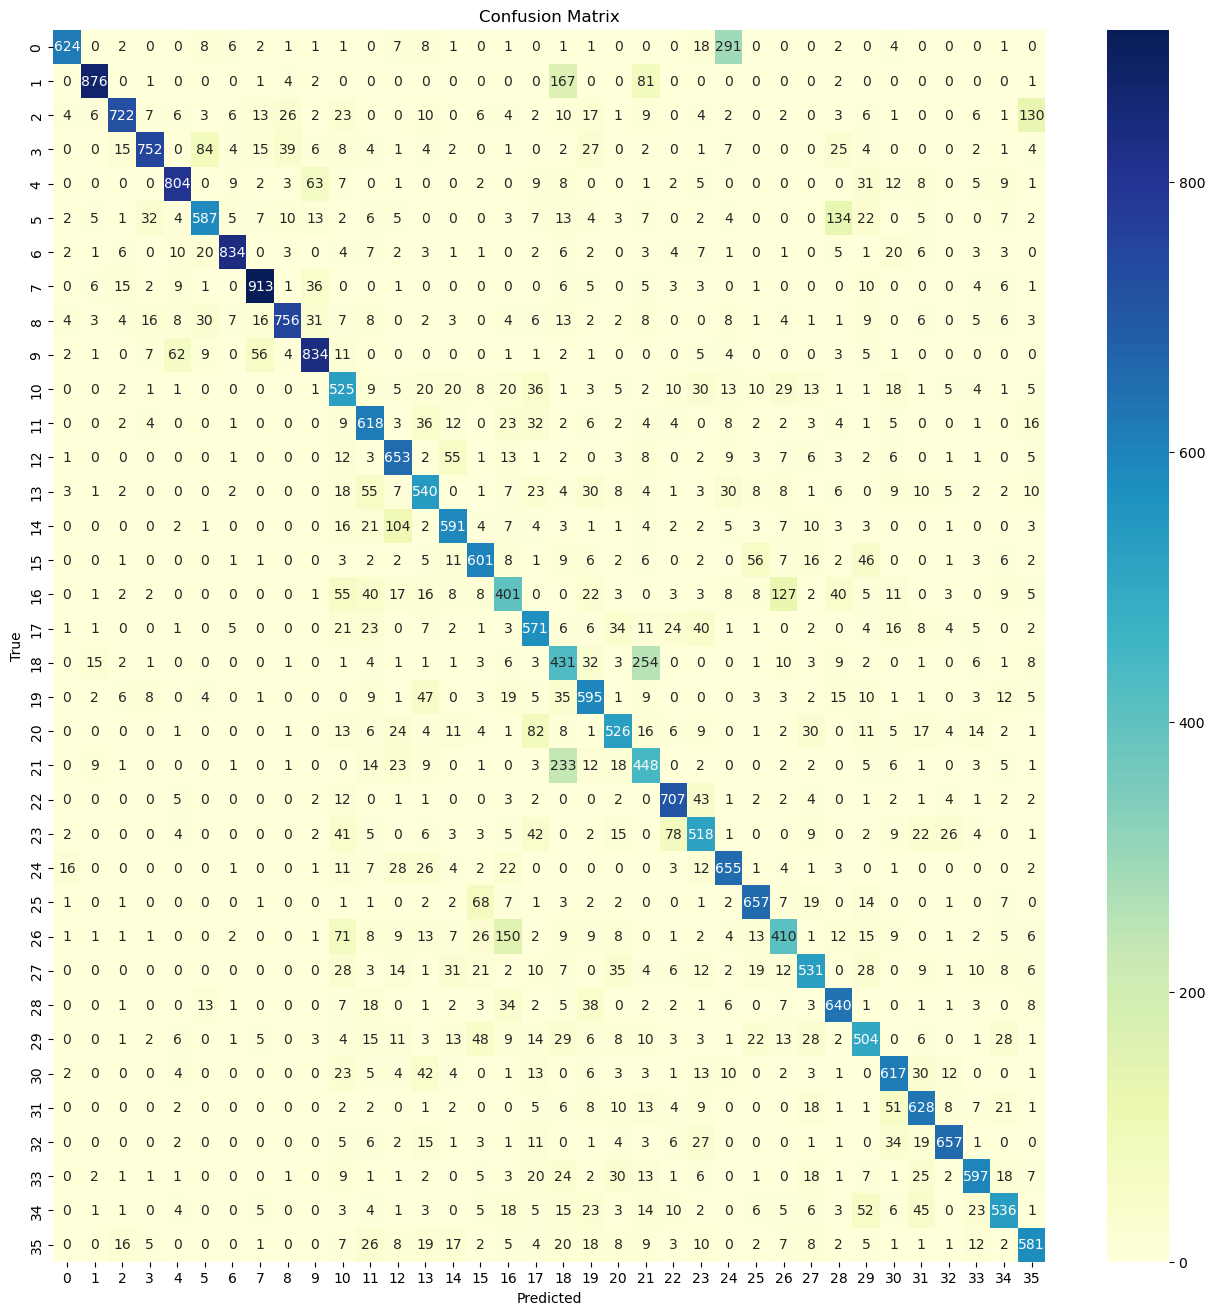

In [19]:
# Generate predictions from the model
svm_pred = model.predict(x_te)

# Create a confusion matrix
cm = confusion_matrix(y_te, svm_pred)

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 16))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax)

# Add labels and a title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()



# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classification Report</p>


In [20]:
# Calculate precision, recall, and F1-score for multiclass classification
svm_pre = precision_score(y_te, svm_pred, average='weighted') * 100
svm_rec = recall_score(y_te, svm_pred, average='weighted') * 100
svm_f1 = f1_score(y_te, svm_pred, average='weighted') * 100

# Print the precision, recall, and F1-score as percentages
print('Precision: {:.2f}%'.format(svm_pre))
print('Recall: {:.2f}%'.format(svm_rec))
print('F1-Score: {:.2f}%'.format(svm_f1))

# Generate a classification report
report = classification_report(y_te, svm_pred)

# Print the classification report
print(report)

Precision: 74.31%
Recall: 72.86%
F1-Score: 73.19%
              precision    recall  f1-score   support

           0       0.94      0.64      0.76       980
           1       0.94      0.77      0.85      1135
           2       0.90      0.70      0.79      1032
           3       0.89      0.74      0.81      1010
           4       0.86      0.82      0.84       982
           5       0.77      0.66      0.71       892
           6       0.94      0.87      0.90       958
           7       0.88      0.89      0.88      1028
           8       0.89      0.78      0.83       974
           9       0.83      0.83      0.83      1009
           A       0.55      0.66      0.60       800
           B       0.66      0.77      0.71       800
           C       0.70      0.82      0.75       800
           D       0.63      0.68      0.65       800
           E       0.74      0.74      0.74       800
           F       0.72      0.75      0.74       800
           G       0.51      0.

# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Result (RBF SVM)</p>


# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Accuracy</p>


In [21]:
# Calculate accuracy score using the model's score method
accuracyScore2 = model2.score(x_te, y_te) * 100

# Print the accuracy score as a percentage
print('Accuracy Score : {:.3f}%'.format(accuracyScore2))



Accuracy Score : 79.903%




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>


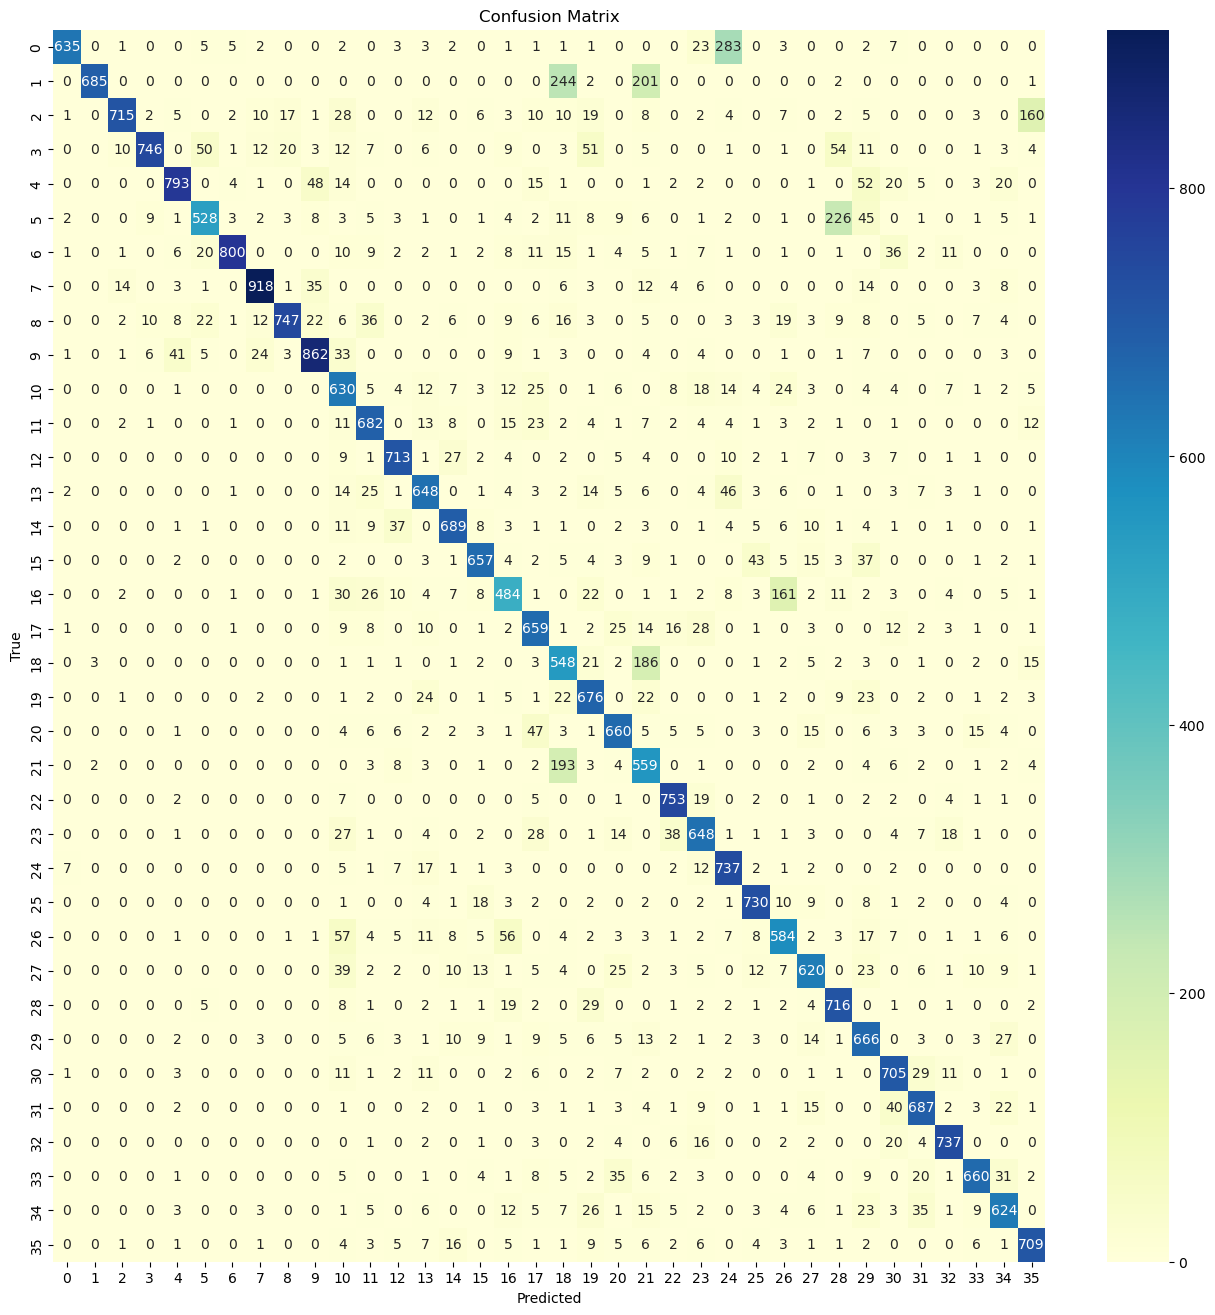

In [22]:
# Generate predictions from the model
svm2_pred = model2.predict(x_te)

# Create a confusion matrix
cm = confusion_matrix(y_te, svm2_pred)

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 16))

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax)

# Add labels and a title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classification Report</p>


In [23]:


# Calculate precision, recall, and F1-score for multiclass classification
svm2_pre = precision_score(y_te, svm2_pred, average='weighted') * 100
svm2_rec = recall_score(y_te, svm2_pred, average='weighted') * 100
svm2_f1 = f1_score(y_te, svm2_pred, average='weighted') * 100

# Print the precision, recall, and F1-score as percentages
print('Precision: {:.2f}%'.format(svm2_pre))
print('Recall: {:.2f}%'.format(svm2_rec))
print('F1-Score: {:.2f}%'.format(svm2_f1))

# Generate a classification report
report2 = classification_report(y_te, svm2_pred)

# Print the classification report
print(report2)

Precision: 81.99%
Recall: 79.90%
F1-Score: 80.15%
              precision    recall  f1-score   support

           0       0.98      0.65      0.78       980
           1       0.99      0.60      0.75      1135
           2       0.95      0.69      0.80      1032
           3       0.96      0.74      0.84      1010
           4       0.90      0.81      0.85       982
           5       0.83      0.59      0.69       892
           6       0.98      0.84      0.90       958
           7       0.93      0.89      0.91      1028
           8       0.94      0.77      0.85       974
           9       0.88      0.85      0.87      1009
           A       0.63      0.79      0.70       800
           B       0.80      0.85      0.83       800
           C       0.88      0.89      0.88       800
           D       0.80      0.81      0.80       800
           E       0.86      0.86      0.86       800
           F       0.87      0.82      0.85       800
           G       0.71      0.

# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Result (Polynomial SVM)</p>



# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Accuracy</p>


In [24]:
# Calculate accuracy score using the model's score method
accuracyScore3 = model3.score(x_te, y_te) * 100

# Print the accuracy score as a percentage
print('Accuracy Score : {:.3f}%'.format(accuracyScore3))




Accuracy Score : 74.711%




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>


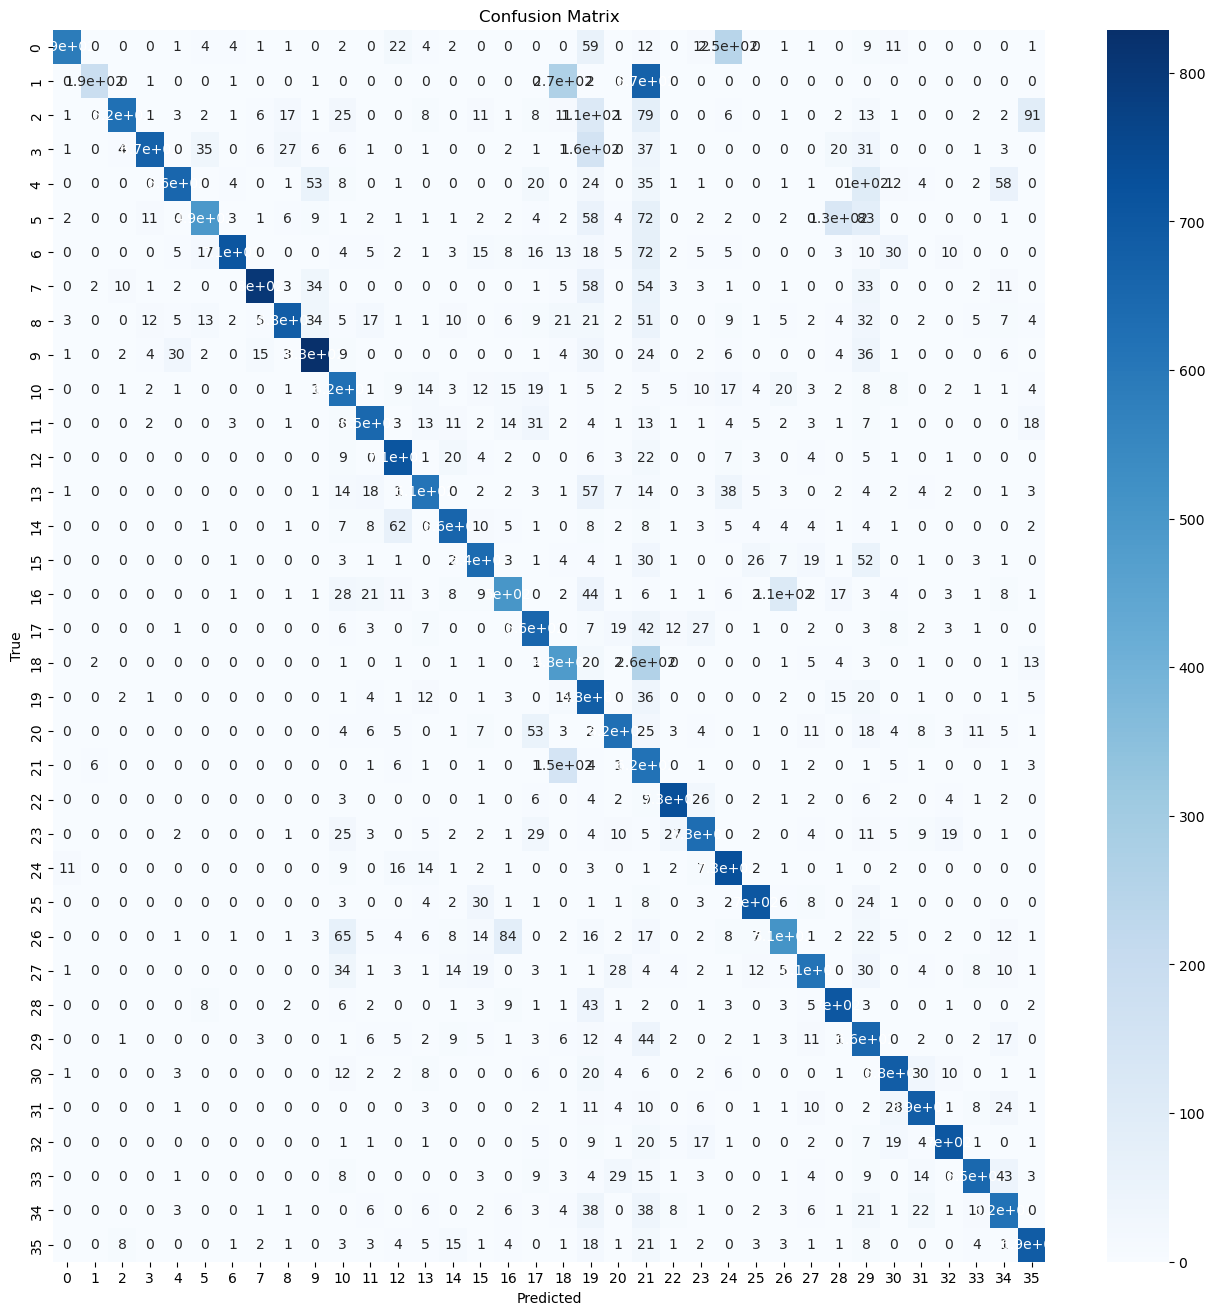

In [25]:
# Generate predictions from the model
svm3_pred = model3.predict(x_te)

# Create a confusion matrix
cm = confusion_matrix(y_te, svm3_pred)

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 16))

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, ax=ax)

# Add labels and a title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()



# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classification Report</p>


In [26]:


# Calculate precision, recall, and F1-score for multiclass classification
svm3_pre = precision_score(y_te, svm3_pred, average='weighted') * 100
svm3_rec = recall_score(y_te, svm3_pred, average='weighted') * 100
svm3_f1 = f1_score(y_te, svm3_pred, average='weighted') * 100

# Print the precision, recall, and F1-score as percentages
print('Precision: {:.2f}%'.format(svm3_pre))
print('Recall: {:.2f}%'.format(svm3_rec))
print('F1-Score: {:.2f}%'.format(svm3_f1))

# Generate a classification report
report3 = classification_report(y_te, svm3_pred)

# Print the classification report
print(report3)

Precision: 80.77%
Recall: 74.71%
F1-Score: 75.36%
              precision    recall  f1-score   support

           0       0.96      0.60      0.74       980
           1       0.95      0.17      0.28      1135
           2       0.96      0.60      0.74      1032
           3       0.95      0.66      0.78      1010
           4       0.92      0.67      0.77       982
           5       0.86      0.55      0.67       892
           6       0.97      0.74      0.84       958
           7       0.95      0.78      0.86      1028
           8       0.91      0.70      0.79       974
           9       0.85      0.82      0.84      1009
           A       0.67      0.78      0.72       800
           B       0.85      0.81      0.83       800
           C       0.82      0.89      0.85       800
           D       0.83      0.77      0.80       800
           E       0.85      0.82      0.84       800
           F       0.80      0.80      0.80       800
           G       0.75      0.

# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Hyperparameter Tuning</p>

In [27]:
al_name = ['Linear SVM','RBF SVM','Polynomial SVM']
acc_all = [(al)for al in [accuracyScore, accuracyScore2, accuracyScore3]]
pre_all = [(al)for al in [svm_pre, svm2_pre,svm3_pre]]
rec_all = [(al)for al in [svm_rec , svm2_rec,svm3_rec]]
f1_all = [(al)for al in [svm_f1, svm2_f1,svm3_f1]]

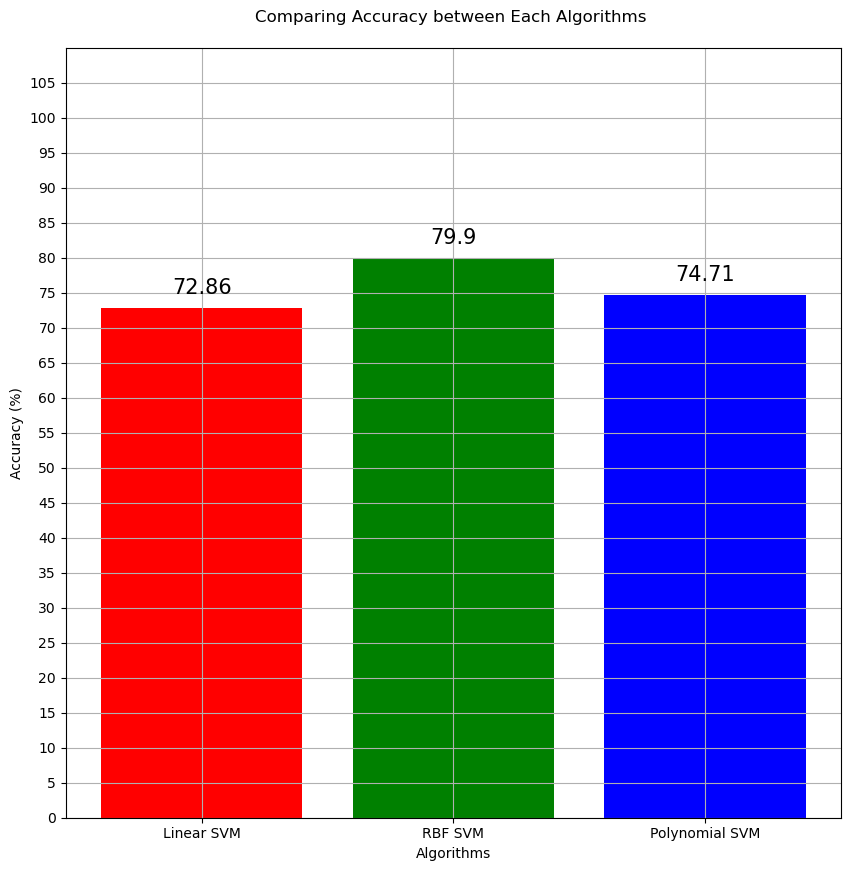

In [28]:
plt.figure(figsize=(10,10))
plt.grid(True)
bars = plt.bar(x=al_name, height=acc_all,color=['red', 'green', 'blue', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', color='black', fontsize=15)


plt.xticks()
plt.ylim((0,110))
plt.yticks(np.arange(0,110,5))
plt.title("Comparing Accuracy between Each Algorithms \n")
plt.ylabel("Accuracy (%)")
plt.xlabel("Algorithms")
plt.show()


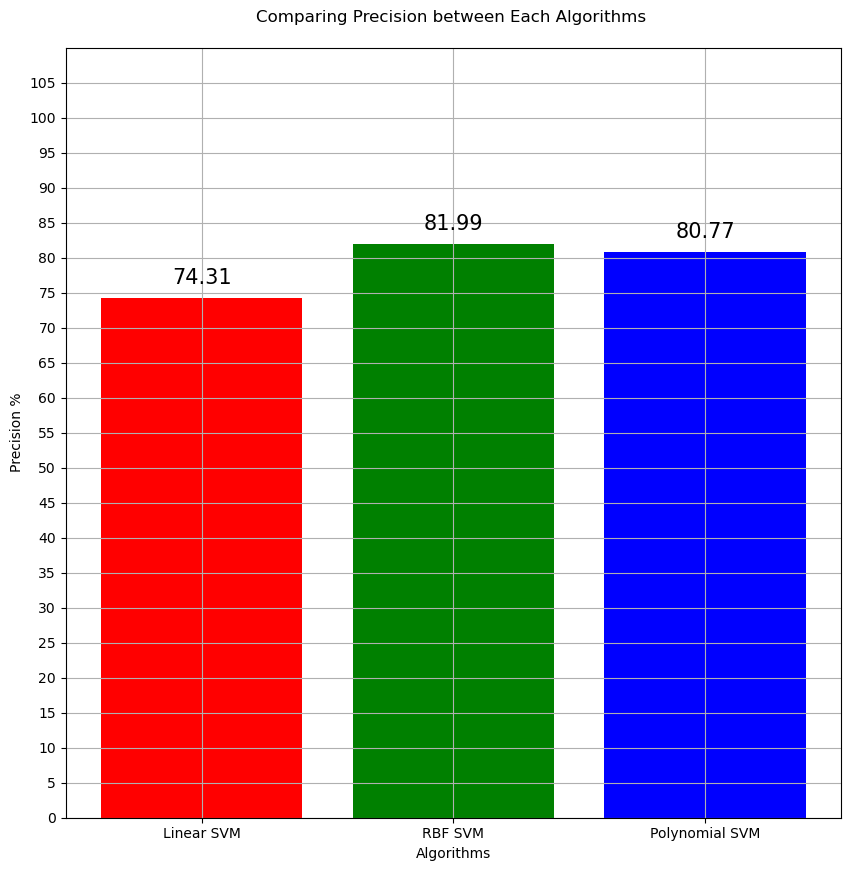

In [29]:
plt.figure(figsize=(10,10))
plt.grid(True)
bars = plt.bar(x=al_name, height=pre_all,color=['red', 'green', 'blue', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', color='black', fontsize=15)

plt.xticks()
plt.ylim((0,110))
plt.yticks(np.arange(0,110,5))
plt.title("Comparing Precision between Each Algorithms \n")
plt.ylabel("Precision %")
plt.xlabel("Algorithms")
plt.show()

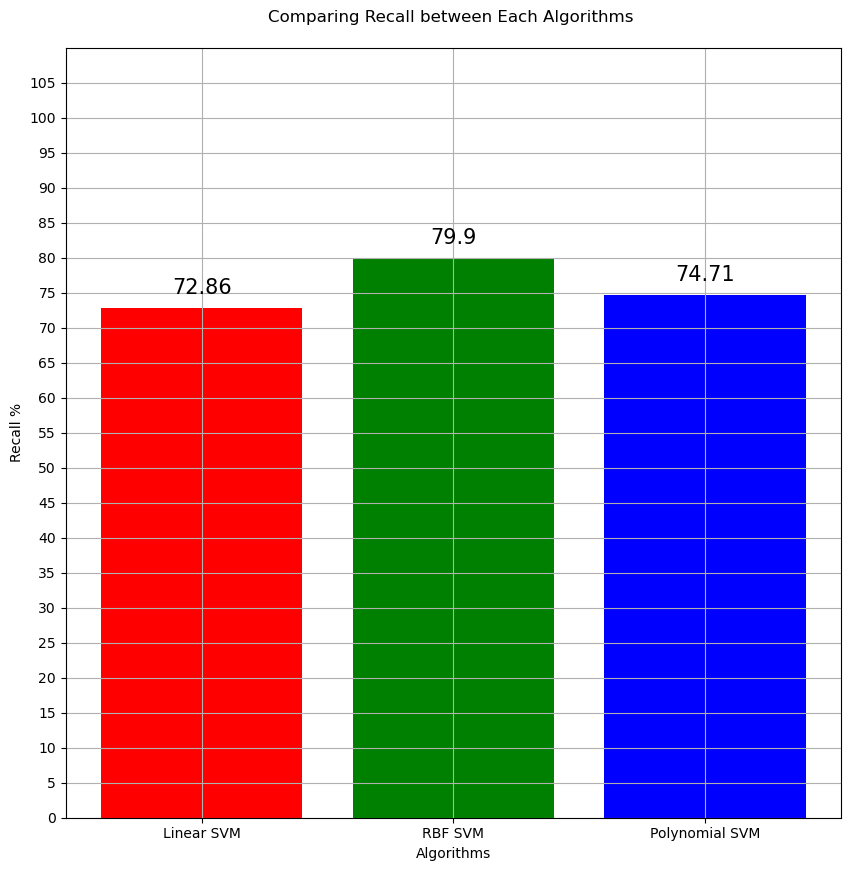

In [30]:
plt.figure(figsize=(10,10))
plt.grid(True)
bars = plt.bar(x=al_name, height=rec_all,color=['red', 'green', 'blue', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', color='black', fontsize=15)


plt.xticks()
plt.ylim((0,110))
plt.yticks(np.arange(0,110,5))
plt.title("Comparing Recall between Each Algorithms \n")
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
plt.show()

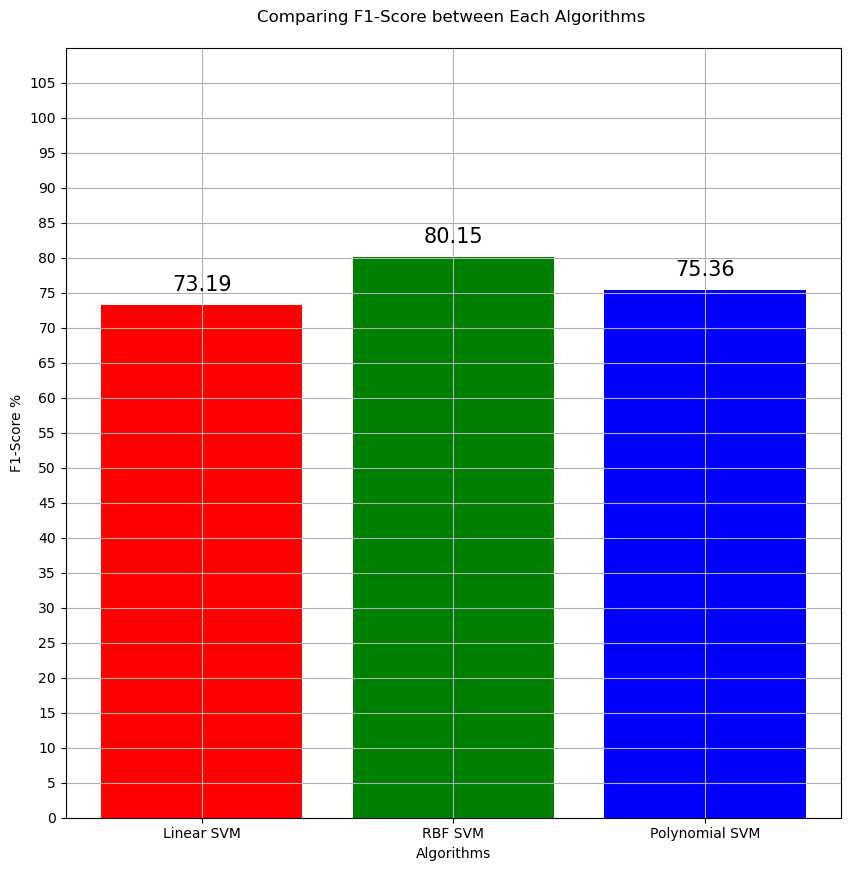

In [31]:
plt.figure(figsize=(10,10))
plt.grid(True)
bars = plt.bar(x=al_name, height=f1_all,color=['red', 'green', 'blue', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', color='black', fontsize=15)

plt.xticks()
plt.ylim((0,110))
plt.yticks(np.arange(0,110,5))
plt.title("Comparing F1-Score between Each Algorithms \n")
plt.ylabel("F1-Score %")
plt.xlabel("Algorithms")
plt.show()

# <p style="padding:10px;background-color:#EF9595;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Soo Khee</p>

# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Modeling (KNN)</p>

In [32]:
# instantiate model
knn = KNeighborsClassifier(n_neighbors = 5)

In [33]:
# fit model to data
knn.fit(x_tr, y_tr)

C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()


# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Result (KNN)</p>

# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Accuracy, Precision, Recall, F1 Score</p>


In [34]:
# predict on new data
y_knn=knn.predict(x_te)

In [35]:
# Performance evaluation
accuracy = accuracy_score(y_te, y_knn)*100
precision = precision_score(y_te, y_knn, average='weighted')*100
recall = recall_score(y_te, y_knn, average='weighted')*100
f1 = f1_score(y_te, y_knn, average='weighted')*100

In [36]:
# Print the evaluation metrics
print("Accuracy  : {:.4f}%".format(accuracy))
print("Precision : {:.4f}%".format(precision))
print("Recall    : {:.4f}%".format(recall))
print("F1 Score  : {:.4f}%".format(f1))

Accuracy  : 71.6656%
Precision : 76.6796%
Recall    : 71.6656%
F1 Score  : 72.0763%




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classification Report</p>


In [37]:
# Classification Report
report = classification_report(y_te, y_knn)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.84      0.33      0.47       980
           1       0.82      0.58      0.68      1135
           2       0.92      0.54      0.68      1032
           3       0.92      0.72      0.81      1010
           4       0.82      0.69      0.75       982
           5       0.81      0.38      0.52       892
           6       0.95      0.82      0.88       958
           7       0.87      0.86      0.86      1028
           8       0.95      0.59      0.72       974
           9       0.78      0.83      0.80      1009
           A       0.65      0.72      0.68       800
           B       0.84      0.65      0.74       800
           C       0.65      0.91      0.76       800
           D       0.87      0.68      0.76       800
           E       0.78      0.78      0.78       800
           F       0.78      0.68      0.73       800
           G       0.76      0.47      0.58       800
           H       0.68    


# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>


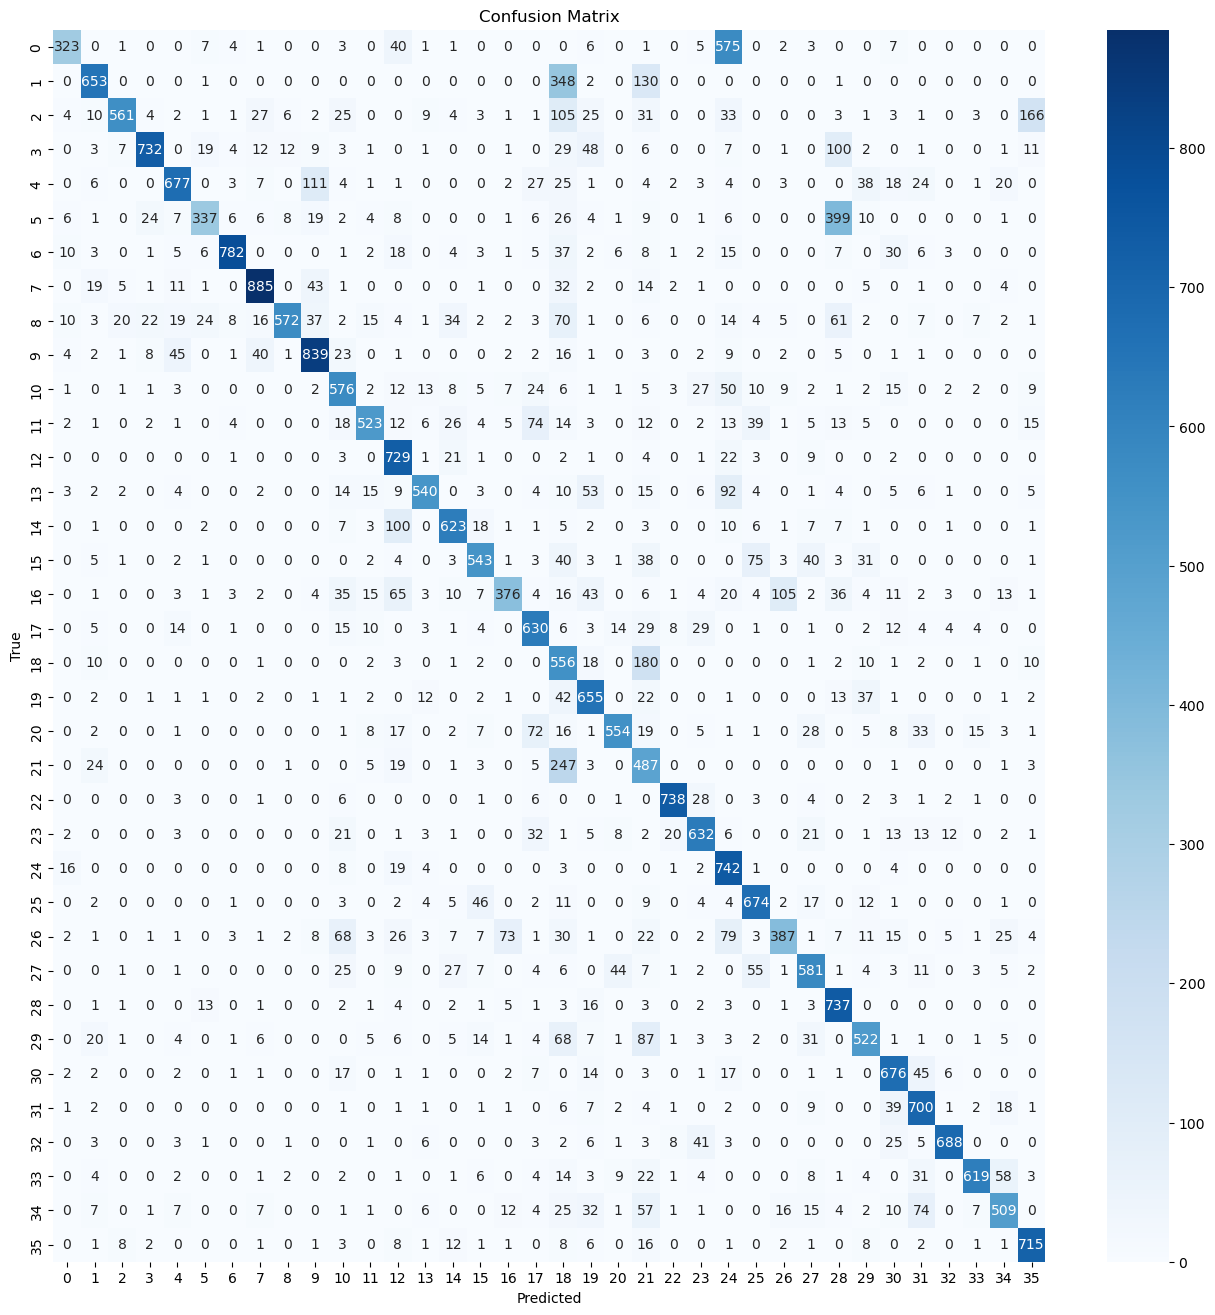

In [38]:
# Compute the confusion matrix
cm = confusion_matrix(y_te, y_knn)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(16, 16))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Hyperparameter Tuning</p>




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Grid Search</p>


In [40]:
# Define parameter grid for grid search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 21, 41, 61],
    'weights': ['uniform', 'distance'],
}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_tr, y_tr)
best_score=grid_search.best_score_*100
best_model=grid_search.best_estimator_

C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ang Soo Khee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

In [41]:
# Print best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy  : {:.4f}%".format(best_score))

Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy  : 73.7300%




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Accuracy, Precision, Recall, F1 Score</p>


In [43]:
y_knn = best_model.predict(x_te)

In [44]:
# Performance evaluation
accuracy = accuracy_score(y_te, y_knn)*100
precision = precision_score(y_te, y_knn, average='weighted')*100
recall = recall_score(y_te, y_knn, average='weighted')*100
f1 = f1_score(y_te, y_knn, average='weighted')*100

In [45]:
# Print the evaluation metrics
print("Accuracy  : {:.4f}%".format(accuracy))
print("Precision : {:.4f}%".format(precision))
print("Recall    : {:.4f}%".format(recall))
print("F1 Score  : {:.4f}%".format(f1))

Accuracy  : 72.2045%
Precision : 77.1158%
Recall    : 72.2045%
F1 Score  : 72.5455%




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classification Report</p>


In [46]:
# Classification Report
report = classification_report(y_te, y_knn)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.87      0.33      0.47       980
           1       0.90      0.58      0.70      1135
           2       0.92      0.53      0.67      1032
           3       0.95      0.71      0.81      1010
           4       0.89      0.63      0.74       982
           5       0.83      0.41      0.55       892
           6       0.96      0.82      0.89       958
           7       0.87      0.86      0.87      1028
           8       0.95      0.60      0.74       974
           9       0.79      0.83      0.81      1009
           A       0.70      0.70      0.70       800
           B       0.85      0.64      0.73       800
           C       0.69      0.90      0.78       800
           D       0.86      0.69      0.76       800
           E       0.77      0.79      0.78       800
           F       0.82      0.68      0.75       800
           G       0.71      0.48      0.58       800
           H       0.69    


# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>


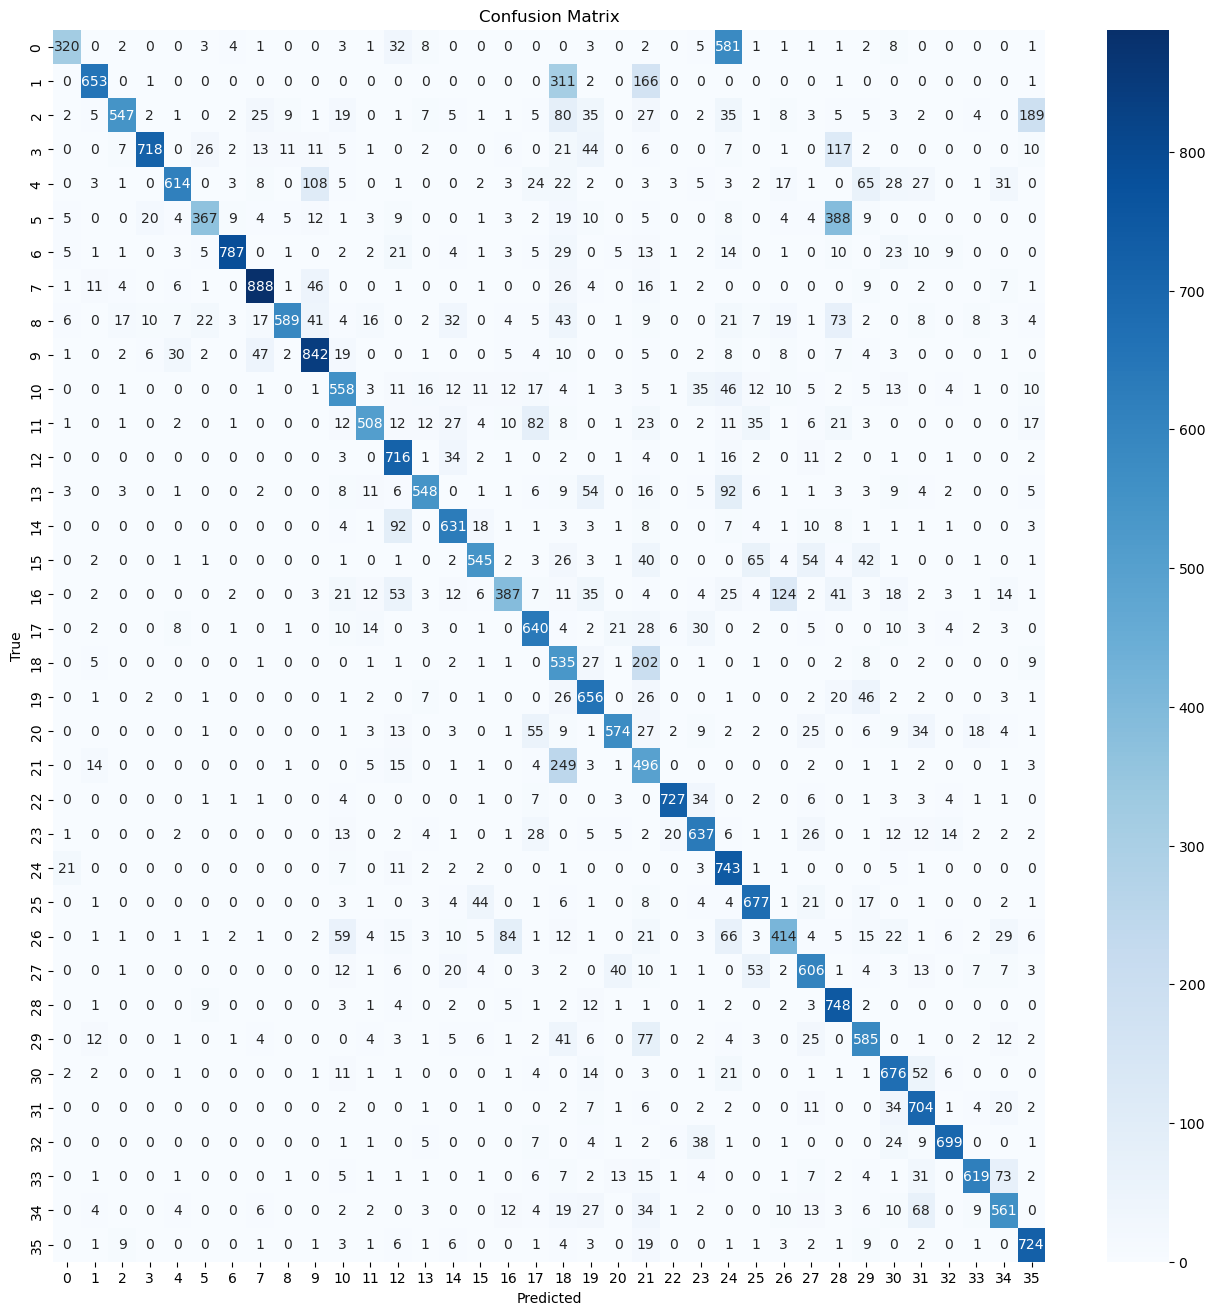

In [47]:
# Compute the confusion matrix
cm = confusion_matrix(y_te, y_knn)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(16, 16))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# <p style="padding:10px;background-color:#EF9595;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Wei Hong</p>



# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Modeling (Random Forest)</p>

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_tr, y_tr)

C:\Users\User\AppData\Local\Temp\ipykernel_7860\3579266315.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)


RandomForestClassifier(random_state=42)



# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Result (Random Forest)</p>

# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Accuracy, Precision, Recall, F1 Score</p>


In [16]:
# predict on new data
y_rf=rf.predict(x_te)

In [17]:
# Performance evaluation
accuracy = accuracy_score(y_te, y_rf)*100
precision = precision_score(y_te, y_rf, average='weighted')*100
recall = recall_score(y_te, y_rf, average='weighted')*100
f1 = f1_score(y_te, y_rf, average='weighted')*100

In [18]:
# Print the evaluation metrics
print("Accuracy  : {:.4f}%".format(accuracy))
print("Precision : {:.4f}%".format(precision))
print("Recall    : {:.4f}%".format(recall))
print("F1 Score  : {:.4f}%".format(f1))

Accuracy  : 80.3571%
Precision : 80.9082%
Recall    : 80.3571%
F1 Score  : 80.2841%




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classification Report</p>


In [19]:
y_pred = rf.predict(x_te)

print(classification_report(y_te,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       980
           1       0.95      0.98      0.96      1135
           2       0.94      0.70      0.80      1032
           3       0.92      0.80      0.86      1010
           4       0.87      0.77      0.82       982
           5       0.83      0.66      0.74       892
           6       0.92      0.88      0.90       958
           7       0.88      0.91      0.89      1028
           8       0.92      0.69      0.79       974
           9       0.76      0.84      0.80      1009
           A       0.65      0.76      0.70       800
           B       0.74      0.82      0.78       800
           C       0.83      0.86      0.84       800
           D       0.81      0.76      0.78       800
           E       0.81      0.82      0.81       800
           F       0.81      0.81      0.81       800
           G       0.76      0.52      0.62       800
           H       0.72    

# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>


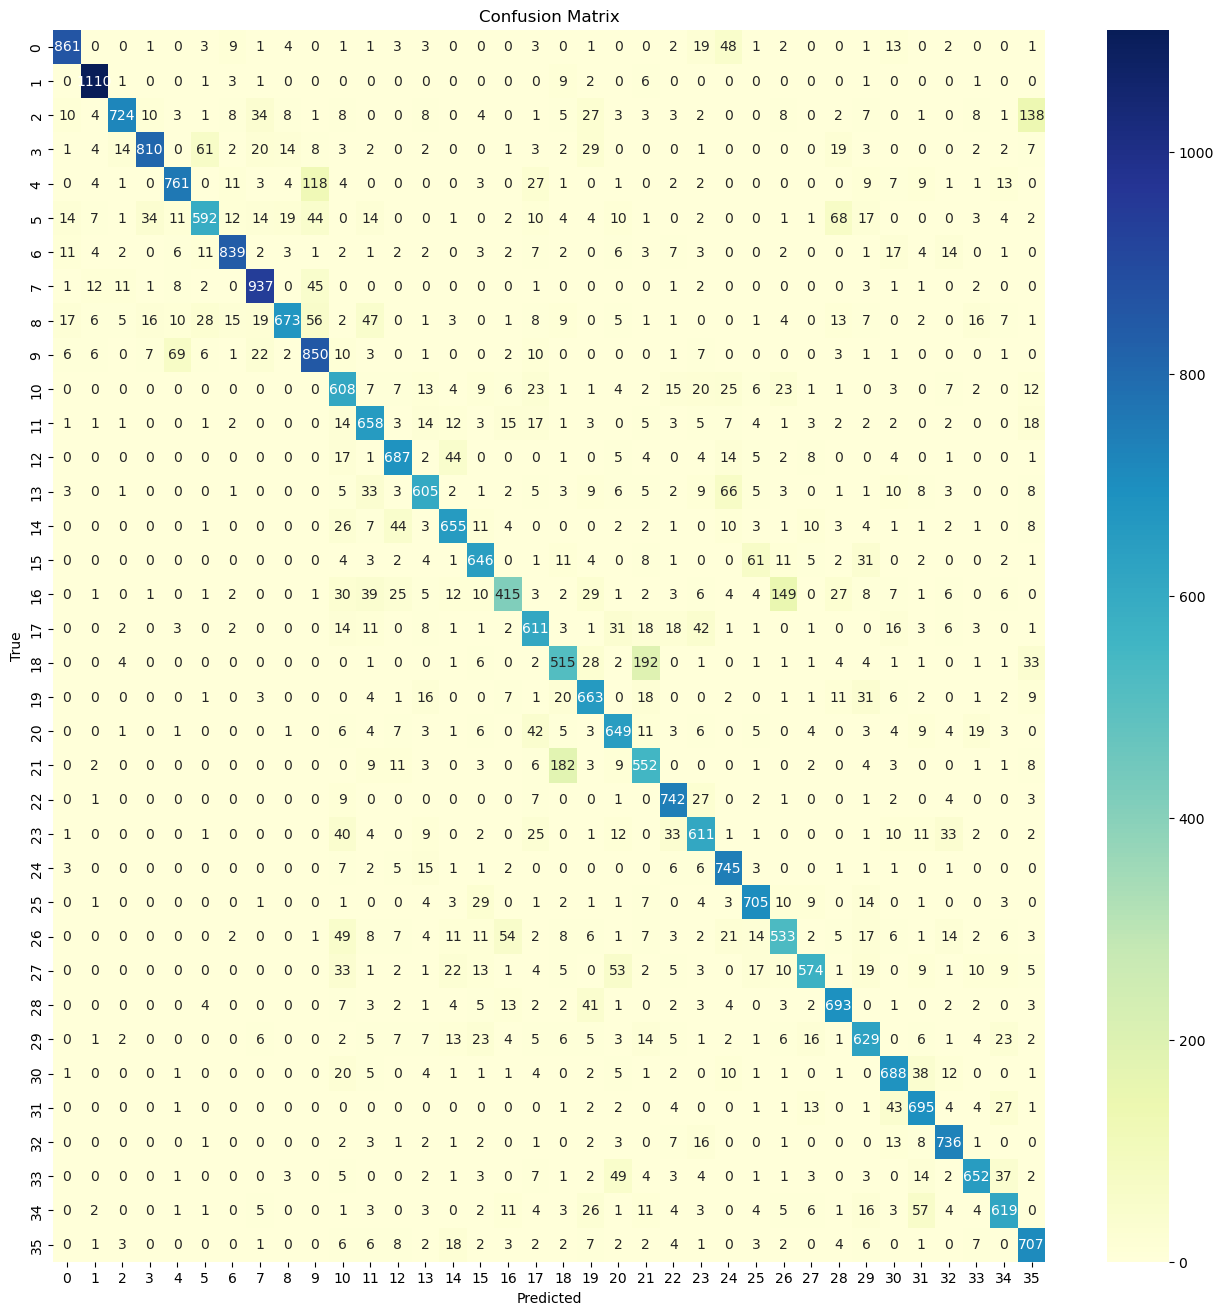

In [20]:
# Create a confusion matrix
cm = confusion_matrix(y_te, y_pred)

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 16))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax)

# Add labels and a title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()



# <p style="padding:10px;background-color:#AEE2FF;margin:0;color:#213555;font-family:newtimeroman;font-size:90%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Hyperparameter Tuning</p>



# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Grid Search</p>


In [21]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_tr, y_tr)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [22]:
best_params 

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Accuracy, Precision, Recall, F1 Score</p>


In [30]:
# predict on new data
y_rf=best_model.predict(x_te)

In [31]:
# Performance evaluation
accuracy = accuracy_score(y_te, y_rf)*100
precision = precision_score(y_te, y_rf, average='weighted')*100
recall = recall_score(y_te, y_rf, average='weighted')*100
f1 = f1_score(y_te, y_rf, average='weighted')*100

In [32]:
# Print the evaluation metrics
print("Accuracy  : {:.4f}%".format(accuracy))
print("Precision : {:.4f}%".format(precision))
print("Recall    : {:.4f}%".format(recall))
print("F1 Score  : {:.4f}%".format(f1))

Accuracy  : 80.9740%
Precision : 81.5951%
Recall    : 80.9740%
F1 Score  : 80.8928%




# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classification Report</p>


In [26]:
# Generate predictions from the model
y_pred = best_model.predict(x_te)

print(classification_report(y_te,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       980
           1       0.94      0.97      0.96      1135
           2       0.95      0.74      0.83      1032
           3       0.92      0.81      0.87      1010
           4       0.90      0.76      0.83       982
           5       0.87      0.69      0.77       892
           6       0.93      0.88      0.90       958
           7       0.89      0.91      0.90      1028
           8       0.94      0.72      0.82       974
           9       0.76      0.88      0.82      1009
           A       0.67      0.73      0.70       800
           B       0.77      0.81      0.79       800
           C       0.82      0.86      0.84       800
           D       0.83      0.74      0.79       800
           E       0.81      0.82      0.82       800
           F       0.84      0.81      0.82       800
           G       0.79      0.49      0.61       800
           H       0.71    

# <p style="padding:10px;background-color:#F5F3C1;margin:0;color:#213555;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>


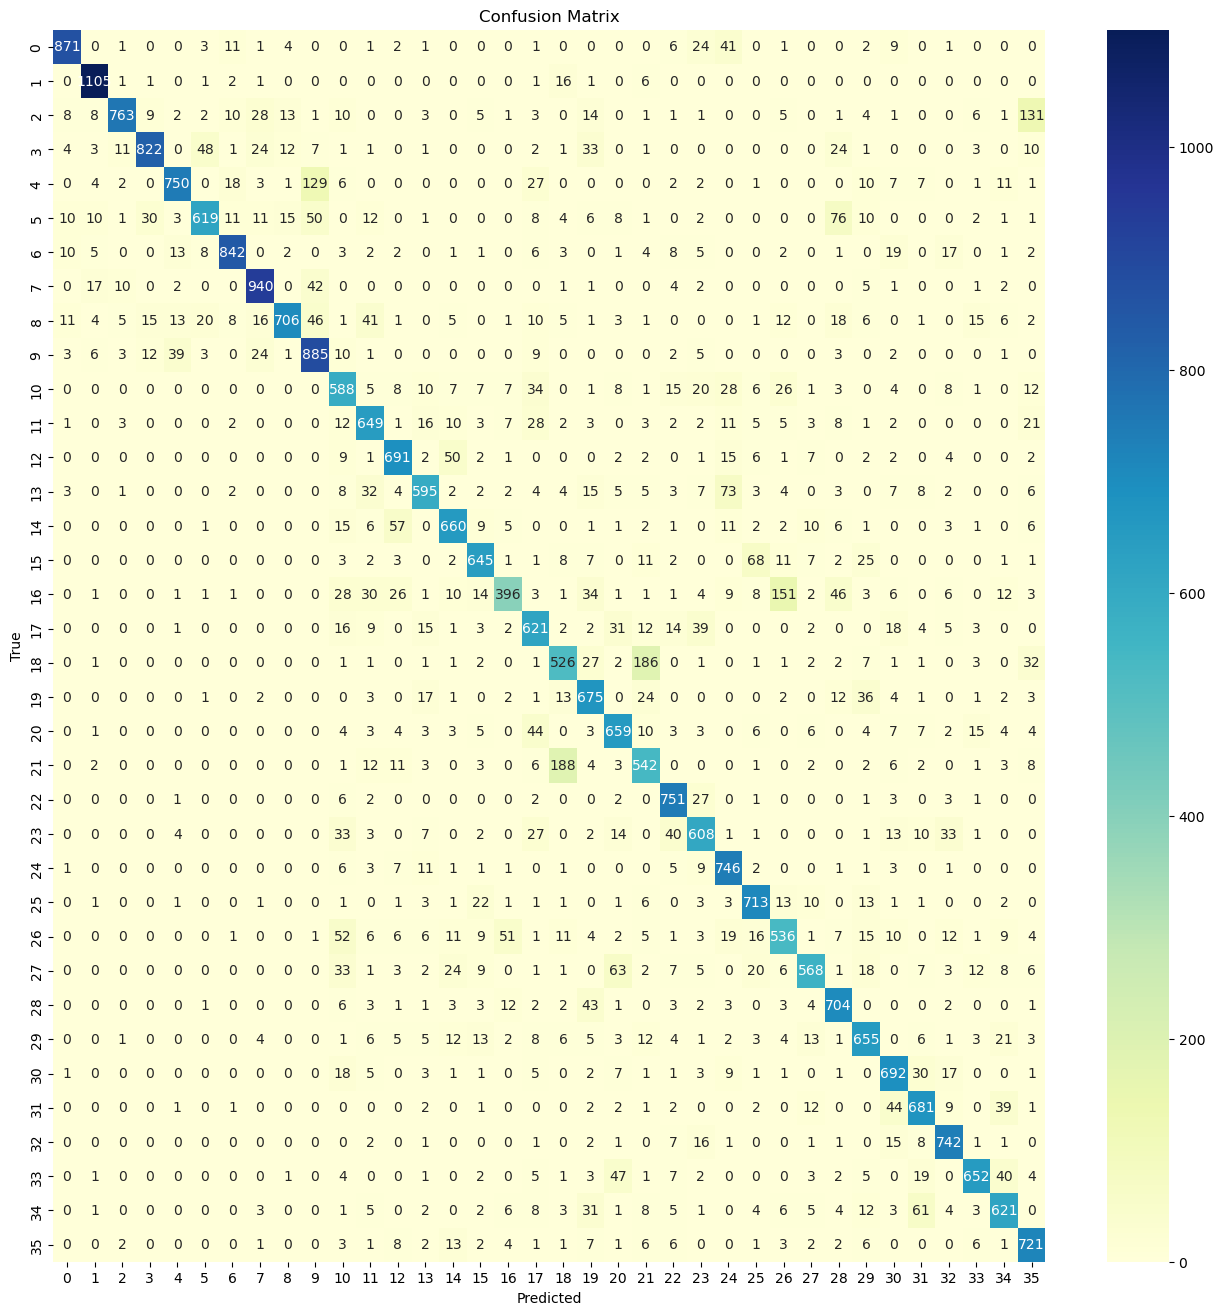

In [27]:
# Create a confusion matrix
cm = confusion_matrix(y_te, y_pred)

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 16))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax)

# Add labels and a title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Deployment</p>

In [2]:
import cv2

image = cv2.imread("digit.png") 

print(type(image))

<class 'numpy.ndarray'>


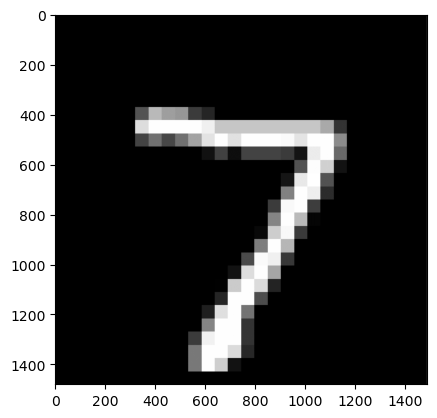

In [6]:
from matplotlib import pyplot as plt

plt.imshow(image)
plt.show()


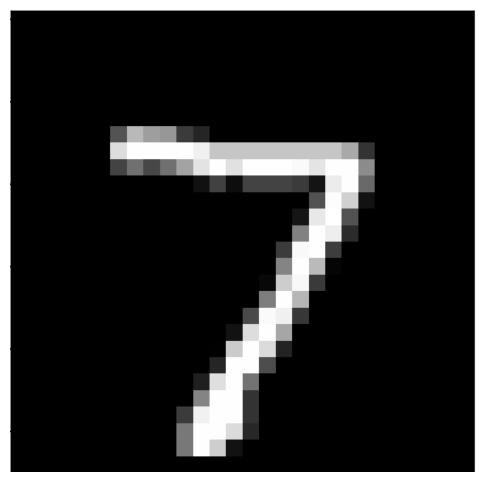

In [37]:
import fitz  # PyMuPDF
import matplotlib.pyplot as plt

# Replace 'your_pdf_file.pdf' with the path to your PDF file
pdf_file = "digitpdf.pdf"

# Open the PDF file
pdf_document = fitz.open(pdf_file)

# Choose the page number and image index you want to display
page_number = 0  # Change this to the desired page number (0 for the first page)
img_index = 0  # Change this index to select a different image if necessary

# Get the page
page = pdf_document[page_number]

# Get a list of image references on the page
image_list = page.get_images(full=True)

# Select the image you want to display
img_ref = image_list[img_index]

# Extract the image data
xref = img_ref[0]
base_image = pdf_document.extract_image(xref)
image_data = base_image["image"]

# Create a temporary image file to display it with matplotlib
temp_image_filename = "temp_image.png"
with open(temp_image_filename, "wb") as f:
    f.write(image_data)

# Display the temporary image using matplotlib
image = plt.imread(temp_image_filename)
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.imshow(image, cmap='gray')  # Assuming grayscale, change cmap as needed
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Close the PDF file
pdf_document.close()
